<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#二分探索・三分探索" data-toc-modified-id="二分探索・三分探索-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>二分探索・三分探索</a></span></li><li><span><a href="#はじめに" data-toc-modified-id="はじめに-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>はじめに</a></span></li><li><span><a href="#二分探索" data-toc-modified-id="二分探索-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>二分探索</a></span><ul class="toc-item"><li><span><a href="#二分探索とは" data-toc-modified-id="二分探索とは-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>二分探索とは</a></span></li><li><span><a href="#二分探索の実装" data-toc-modified-id="二分探索の実装-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>二分探索の実装</a></span></li><li><span><a href="#二分探索の注意点" data-toc-modified-id="二分探索の注意点-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>二分探索の注意点</a></span><ul class="toc-item"><li><span><a href="#そもそも二分探索が使用できるかどうか" data-toc-modified-id="そもそも二分探索が使用できるかどうか-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>そもそも二分探索が使用できるかどうか</a></span></li><li><span><a href="#求めたい値と条件設定" data-toc-modified-id="求めたい値と条件設定-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>求めたい値と条件設定</a></span></li><li><span><a href="#状態の境目が探索域に無いケース" data-toc-modified-id="状態の境目が探索域に無いケース-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>状態の境目が探索域に無いケース</a></span></li></ul></li><li><span><a href="#bisect.bisect_left()-/-bisect.bisect_right()" data-toc-modified-id="bisect.bisect_left()-/-bisect.bisect_right()-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>bisect.bisect_left() / bisect.bisect_right()</a></span></li></ul></li><li><span><a href="#三分探索" data-toc-modified-id="三分探索-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>三分探索</a></span><ul class="toc-item"><li><span><a href="#三分探索とは" data-toc-modified-id="三分探索とは-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>三分探索とは</a></span></li><li><span><a href="#三分探索の実装" data-toc-modified-id="三分探索の実装-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>三分探索の実装</a></span></li><li><span><a href="#三分探索と（ほぼ）同じことを二分探索で行える？" data-toc-modified-id="三分探索と（ほぼ）同じことを二分探索で行える？-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>三分探索と（ほぼ）同じことを二分探索で行える？</a></span></li><li><span><a href="#三分探索の注意点" data-toc-modified-id="三分探索の注意点-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>三分探索の注意点</a></span></li></ul></li><li><span><a href="#二分探索・三分探索を用いる問題" data-toc-modified-id="二分探索・三分探索を用いる問題-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>二分探索・三分探索を用いる問題</a></span></li></ul></div>

# 二分探索・三分探索

# はじめに

この文書では、にぶたん！こと二分探索の解説を行う。え、そんな呼び方しない……？おかしいな……。

二分探索は、特定の値を探索する際に利用できる手法で、検索の計算量を $O(N)$ から $O(log N)$ へと削減できるという、非常に強力なものだ。強力なだけあって利用頻度も高い。ただし、使用するためには、ある条件を満たしている必要がある。

二分探索の話が終われば、三分探索の話もする予定としている。どちらも求めたい範囲を縮小していく仕組みとなっており、実装に似たところもあるため、ついでに覚えておくといいだろう。ただ、二分探索に比べると、利用頻度はあまり高くない。こちらもまた、使用時にはある条件を満たしている必要がある。

# 二分探索

## 二分探索とは

どのように説明を始めるべきか悩んだのだが、二分探索については、極めて抽象的、かつ本質的な話から入ろうと思う。これは、二分探索を使用できる条件とも密接に関わっている。

ある連続的に変化する実数 $x$ と、ある二値的な状態 $A$, $B$ が存在するとする。状態は $A$, $B$ の必ずどちらかになるが、どちらになるかは $x$ のみによって定まるとする。また、$x$ を連続的に変化させた場合、ある数値 $t$ を境として、状態 $A$ になるか $B$ になるかが綺麗に分割されるとする。

つまり、下図のようになっている。

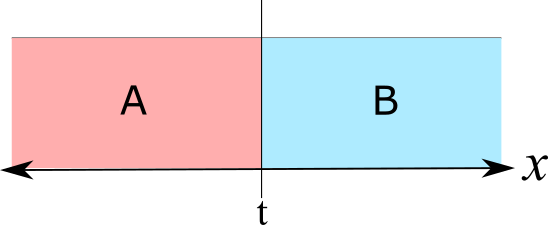

二分探索とは、この時の $t$ の値を求める手法である。

さて、今 $x$ の探索範囲の最小値と最大値をそれぞれ $left$, $right$ とする。このとき、理想としては $x=left$ の地点では状態が $A$ 、$x=right$ の地点では状態が $B$ となっているが、必ずしもそうである必要はない（後述）。

単純な探索においては、$x$ を $left$ から $right$ まで連続的に変化させ、$t$ の場所を探すことになるだろう。いわゆる線形探索だ。

二分探索では、少し違った方法で探索を行う。すなわち $left$ と $right$ の間にある適当な地点 $mid$ の状態を調べてみるのだ。

- 仮に $mid$ の状態が $A$ だった場合、 $t$ は少なくとも $mid$ より大きいことが分かる。よって、最小値を $left$ から $mid$ へ更新できる。  
- 逆に $mid$ の状態が $B$ だった場合には、$t$ は少なくとも $mid$ より小さいことが分かる。よって、最大値を $right$ から $mid$ へ更新できる。

いずれの場合にしても、$t$ が存在する可能性がある範囲を小さく絞り込むことができる。この絞り込みの操作を繰り返すことにより、最終的に $t$ の場所を見つけることができる……という寸法である。

このように、探索する範囲を二分割し、どちらか条件に合う可能性のある方に絞り込んでいくことから、二分探索と呼ばれている。

にぶたん、実に簡単な理屈である。

## 二分探索の実装

とはいえ、上記の内容はあくまでも抽象的な話であって、具体性に欠ける。そこで、実際の実装をどのように行うのかを見ていこう。

実装の際は、探索の絞り込みの下限・上限を ```left```, ```right``` として、どんどん小さな範囲に更新していくことになる。  
ところで、絞り込んでいく範囲を、どこまで小さくすればいいのだろうか？

それを決めるためには、まず、上記の説明でいう $x$ のことを考えなければならない。

実際のところ、$x$ は実数でもいいし、整数でもいい。実数の場合は、誤差が許される範囲まで絞り込む必要がある。一方、整数である場合は、$x = N$ の時に状態 $A$、$x = N+1$ の時に状態 $B$ となるような地点があるはずなので、```right - left == 1``` となるところまで絞り込んでやればいい。

ここでは、整数であることを前提として例示する。

次に、```mid``` について考える。
まず ```mid``` をどのように決めるかだが、これは ```right``` と ```left``` の中間地点でいい。すなわち、```mid == (right + left) // 2``` と書いてしまっていい。また、```mid``` の地点の状態を確認する必要がある。これは仮に ```check()``` という関数を用意しておく。これが ```False``` なら状態 $A$、```True``` なら状態 $B$ だとしておこう。

すると、以下のようなコードを作成できる。

In [ ]:
while right - left > 1:
    mid = (right + left) // 2
    
    if check(mid):  # mid の状態は B
        right = mid  # 上限を更新できる
    
    else:          # mid の状態は A
        left = mid  # 下限を更新できる

この while ループが終了した時、うまく行けば ```left``` は状態 A の最大値、```right``` は状態 B の最小値となっていることになる。これらの値から、改めてほしい値を取得できるはずだ。


## 二分探索の注意点

### そもそも二分探索が使用できるかどうか

最初に紹介した二分探索の原理とも重なる話だが、**全体として状態が単調に変化する**必要がある。

逆に言うと、単調に変化するものに対してなら二分探索を用いることができるかもしれない。典型的なものでは、なにかが可能となる、ある変数の最小値や最大値などが多い印象がある。

もう一つ二分探索で肝心な条件は、**状態の判定を容易に行える**ということだ。裏を返すと、状態（できる or できないなど）の判定だけなら容易に行えるのであれば、二分探索を使う問題かもしれない。

### 求めたい値と条件設定

実数の探索であれば、誤差を許容できる範囲まで範囲を縮めて適当に答えてやればいい。

しかし、整数の探索の場合には答えるべき数値は、状態 $A$ の最大値、もしくは状態 $B$ の最小値のどちらかということになる。このあたりをきちんと整理しないままに適当に書き始めると、失敗する。

また、状態がどちらなのかをチェックする際に、以下なのか未満なのかなど、境界条件でコーナーケースに引っかかることがあるので注意したい。

### 状態の境目が探索域に無いケース

状態の境目が、そもそも探索域に含まれていない場合もある。この場合は、左端もしくは右端に張り付くような挙動を示すことになり、それに気づかないでいるとおかしなことになってしまう。これを探知する方法は二通りある。

ひとつは、あらかじめ探索域の両端がどのような状態かチェックしてから、二分探索を開始する方法。多少冗長になるが、そもそもやらなくてもいい探索がある場合、それを飛ばせるという利点もある。

もうひとつは、探索域を少し広げてから始めてやる方法である。例えば $0$ ～ $10$ を探索する場合、$-1$ もしくは $11$ を含めて探索してやる。探索範囲に求めたい値が存在しない場合、はみ出して張り付く形になるため、値を調べる時に検出できる。

個人的には後者の方法を用いることが多いが、その場合はどちらに張り付くのことになるのかや、境界条件などに注意する必要がある。

## bisect.bisect_left() / bisect.bisect_right()

二分探索は、他のアルゴリズムと組み合わせることも多い。あらかじめリストがソート済みでさえあれば、ある値 $x$ が何番目にあたるのかを素早く求めることができるからだ。

実はこれによく似た動作をするライブラリがあらかじめ用意されている。それが ```bisect``` で、二種類の関数 ```bisect_left()``` と ```bisect_right()``` が用意されている。

どちらも ```bisect.bisect_left(L, x)```  あるいは ```bisect.bisect_right(L, x)``` で、あるソート済みのシーケンス ```L``` に対して、順序を保ったままある値 ```x``` を挿入できる場所のインデックスを返してくれる。違いは挿入点に複数の候補がある場合で、```bisect_left()``` は最小のインデックスを、```bisect_right()``` は最大のインデックスが返ってくる。

ちなみに ```bisect()``` と書いても、 ```bisect_right()``` と同じ動作をする。

In [8]:
from bisect import bisect_left, bisect_right
L = [1, 2, 4, 4, 4, 5]  # ソート済みである必要がある
print(bisect_left(L, 3))   # 値が挿入できる場所が 1箇所の時は同じ値が返る
print(bisect_right(L, 3))
print(bisect_left(L, 4))   # 値を挿入できる最小のインデックス
print(bisect_right(L, 4))  # 値を挿入できる最大のインデックス

2
2
2
5


```bisect``` は、もちろん内部的に二分探索を行ってくれる仕組みになっており、計算量は $O(log N)$ となっている。

# 三分探索

## 三分探索とは

二分探索と同様、連続的に変化する実数 $x$ と、今度は $x$ から導き出されるある値 $v$ が存在するとする。それっぽく、$f(x) = v$ と書いてもいい。

三分探索とは、この $v$ が**単調減少→単調増加、あるいは単調増加→単調減少という変化をする**とき、その最小値、あるいは最大値をとるような $x$ の値 $t$ を探索する手法である。

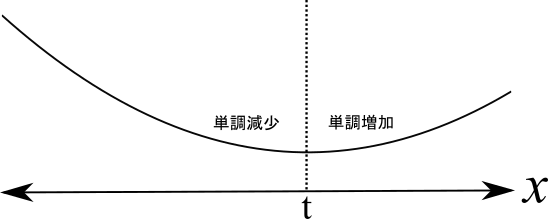

三分探索においては、探索する領域を三つに分割する。すなわち、$left$ と $right$ の間に $mid\_left$ と $mid\_right$ を取り、その地点での値を確認する。ここでは $f(x)$ の最小値を求めるようなケースと仮定する。

- $f(mid\_left) > f(mid\_right)$ の場合、$t$ は $mid\_left$ 以上となる。よって、$left$ を $mid\_left$ に更新できる。
- $f(mid\_left) < f(mid\_right)$ の場合、$t$ は $mid\_right$ 以下となる。よって、$right$ を $mid\_right$ に更新できる。
- $f(mid\_left) = f(mid\_right)$ の場合は、どちらでもよい。

## 三分探索の実装

典型的な三分探索では、探索範囲を三等分して上記の判定を行う。実数範囲の探索として、コードは大体次のような感じだ。

In [ ]:
while right - left > error:  # error は許容誤差
    mid_left= (left * 2 + right) / 3
    mid_right = (left + right * 2) / 3
    if func(mid_left) > func(mid_right):  # func(x) は値を求める関数
        left = mid_left
    else:
        right = mid_right

## 三分探索と（ほぼ）同じことを二分探索で行える？

ところで、実際には三等分する必要が無いことに気づいた人も多いだろう。なぜなら、チェックする部分の増減さえ分かれば十分だからである。

つまり、微分っぽく、十分狭い範囲の増減をチェックしてやることで、二分探索と同じ感じでの実装を行うことができる。この場合、ある地点 $mid$ における傾きの正負を、二分探索の状態判定に用いるようなイメージとなる。

In [ ]:
# 端の処理を考慮していない、あくまでも一例なので注意
while right - left > error:  # error は許容誤差
    mid = (left + right) / 2
    if func(mid) > func(mid + error):
        left = mid
    else:
        right = mid

上の実装例はざっくりとしすぎているかもしれないが、概ねこのような感じで二分探索へと帰着することができる。このため、特に競技プログラミングにおいては、三分探索は必ずしも必須のアルゴリズムというわけでもなさそうだ。

## 三分探索の注意点

三分探索のもっとも重要な注意点は、使用可能な条件だろう。

$f(x)$ は単調増加→単調減少、もしくは単調減少→単調増加となっている必要があるが、ここにおける単調減少・増加は狭義のそれである必要がある。つまり、値が変化しない部分を含んでいてはならない。これはつまり、$f(mid\_left)$ と $f(mid\_right)$ の値が等しくなった時に、正しい絞り込みが行えなくなってしまうからだ。

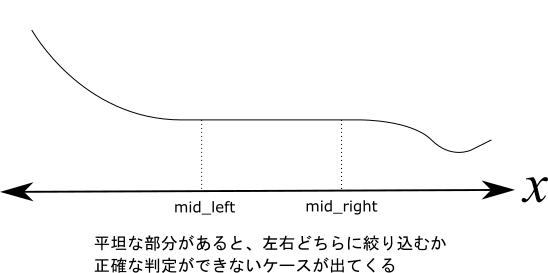

一方、実は単調減少→変化無し→単調増加といった感じの場合は、使用可能である。このケースでは、いずれの場合も正しく判定できる。

# 二分探索・三分探索を用いる問題

[AtCoder](https://atcoder.jp) では、例えば以下の問題で二分探索・三分探索を用いることができる。diff800～1200の問題については、miaoued.net内でちょっとした解説を掲載してあるので、参考にしてみてほしい。

- [AtCoder Beginner Contest 063 D - Widespread](https://atcoder.jp/contests/abc063/tasks/arc075_b)
- [AtCoder Beginner Contest 130 D - Enough Array](https://atcoder.jp/contests/abc130/tasks/abc130_d) - [[miaoued.net内参考解説]](https://miaoued.net/archives/1750)
- [AtCoder Beginner Contest 144 E - Gluttony](https://atcoder.jp/contests/abc144/tasks/abc144_e)
- [AtCoder Beginner Contest 216 E - Amusement Park](https://atcoder.jp/contests/abc216/tasks/abc216_e)  - [[miaoued.net内参考解説]](https://miaoued.net/archives/2121)
- [AtCoder Beginner Contest 203 D - Pond](https://atcoder.jp/contests/abc203/tasks/abc203_d) - 二次元累積和も用いるので、少し難易度が高い
- [AtCoder Regular Contest 049 B - 高橋ノルム君](https://atcoder.jp/contests/arc049/tasks/arc049_b)
- [AtCoder Grand Contest 041 B - Voting Judges](https://atcoder.jp/contests/agc041/tasks/agc041_b)